In [6]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


In [7]:
file_path = "../Resources.2/general_dataset.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,AFG,Afghanistan,1971,NaN,NaN,1893554,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.665129,11475450,0.652
1,AFG,Afghanistan,1972,NaN,NaN,1530347,NaN,0.0,0.0,150.0,...,0.0,0.0,0.000000,0.0,0.0,2120.261216,150.0,2.714539,11791222,-1.089
2,AFG,Afghanistan,1976,NaN,NaN,1980859,NaN,0.0,0.0,51.0,...,0.0,0.0,0.000000,0.0,0.0,618.094723,51.0,1.981389,12943093,-0.295
3,AFG,Afghanistan,1978,NaN,NaN,2153300,NaN,0.0,0.0,120.0,...,0.0,0.0,0.393939,52000.0,52000.0,1979.191965,120.0,1.281715,13341199,0.105
4,AFG,Afghanistan,1980,NaN,NaN,1756302,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,224.601333,0.0,-0.407658,13356500,0.690


In [8]:
hti_df= df[(df['country_name'] == 'Haiti')]
hti_df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
1922,HTI,Haiti,1972,NaN,NaN,391721,1.543642,0.0,0.0,78.0,...,0.000000,0.0,0.064449,959.0,959.0,826.958859,78.0,1.670974,4837334,0.324
1923,HTI,Haiti,1974,NaN,NaN,472091,14.504314,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,10131.894484,0.0,1.715022,5003708,-0.189
1924,HTI,Haiti,1977,NaN,NaN,704144,3.883897,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,8498.583569,0.0,1.964309,5294625,0.387
1925,HTI,Haiti,1979,NaN,NaN,749901,3.125091,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,20.108696,8.0,2.126862,5520187,0.133
1926,HTI,Haiti,1980,NaN,NaN,745071,19.263197,0.0,0.0,0.0,...,28.905911,0.0,7.226478,400000.0,400000.0,7673.223463,220.0,2.203511,5643175,0.696


In [9]:
hti_df= hti_df.drop(['country_name'], axis=1)
hti_df.columns.tolist()

['country_code',
 'year',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thous

In [10]:
hti_df= hti_df[(hti_df['year'] >= 1988) & (hti_df['year'] <= 2020)]
hti_df.set_index('year',inplace = True)
hti_df.head()

,country_code,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,,,,,,,,,,,,
1988,HTI,2.940172e+09,31.110649,1007669,27.427622,0.0,0.0,27.0,54.0,0.0,...,3.492294,0.0,0.873073,91286.0,91286.0,12928.381178,81.0,2.085452,6758222,0.890
1989,HTI,2.901671e+09,30.592998,1023120,7.820710,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,361.409104,0.0,2.043616,6897755,0.508
1990,HTI,2.780139e+09,29.736751,994997,11.995750,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,2.011597,7037915,0.876
1992,HTI,2.668984e+09,34.120608,888522,20.908166,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,13663.068725,0.0,1.943488,7319491,0.492
1993,HTI,2.710842e+09,30.847043,684199,18.336642,0.0,0.0,13.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,67.015145,13.0,1.910631,7460684,0.409


In [11]:
hti_df = hti_df.drop([
 'country_code',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
], axis=1)
hti_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1988 to 2020
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               30 non-null     float64
 1   agriculture_value_added_percentage_gdp          30 non-null     float64
 2   annual_co2_emissions_tons                       30 non-null     int64  
 3   inflation_inflation_gdp_deflation               30 non-null     float64
 4   economic_damages_as_a_share_of_gdp              30 non-null     float64
 5   people_affected_per_100k                        30 non-null     float64
 6   number_of_deaths                                30 non-null     float64
 7   population_population_growth_annual_percentage  30 non-null     float64
 8   population_population_total                     30 non-null     int64  
 9   temperature_change_temp_change_celsius  

In [12]:
hti_df.columns.tolist()

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

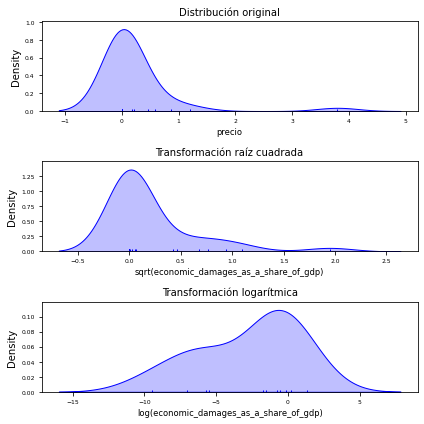

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    hti_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(hti_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(hti_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [14]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(hti_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,135.340785,3241.094991,58.802746,inf,0.652112,5.264817e-13
gamma,272.856911,479.183846,76.436096,inf,0.645186,1.056638e-12
expon,304.593716,1279.069049,76.335838,inf,0.750032,5.688774e-18
lognorm,317.378554,813.552629,80.970528,inf,0.633333,3.380553e-12
exponpow,321.826322,686.823735,81.388032,inf,0.631210,4.148003e-12
powerlaw,339.773378,331.020700,83.016036,inf,0.727185,1.108333e-16
chi2,344.417982,397.557511,83.423350,inf,0.749145,6.410181e-18
logistic,375.525471,1353.461297,82.616262,inf,0.394323,1.022850e-04
norm,393.338948,885.388759,84.006624,inf,0.397405,8.723354e-05
cauchy,412.409577,9392.107171,85.426983,inf,0.689824,9.362901e-15


Pairplot() function from the Seaborn library will output a figure containing histogram and scatter plot between each variable.

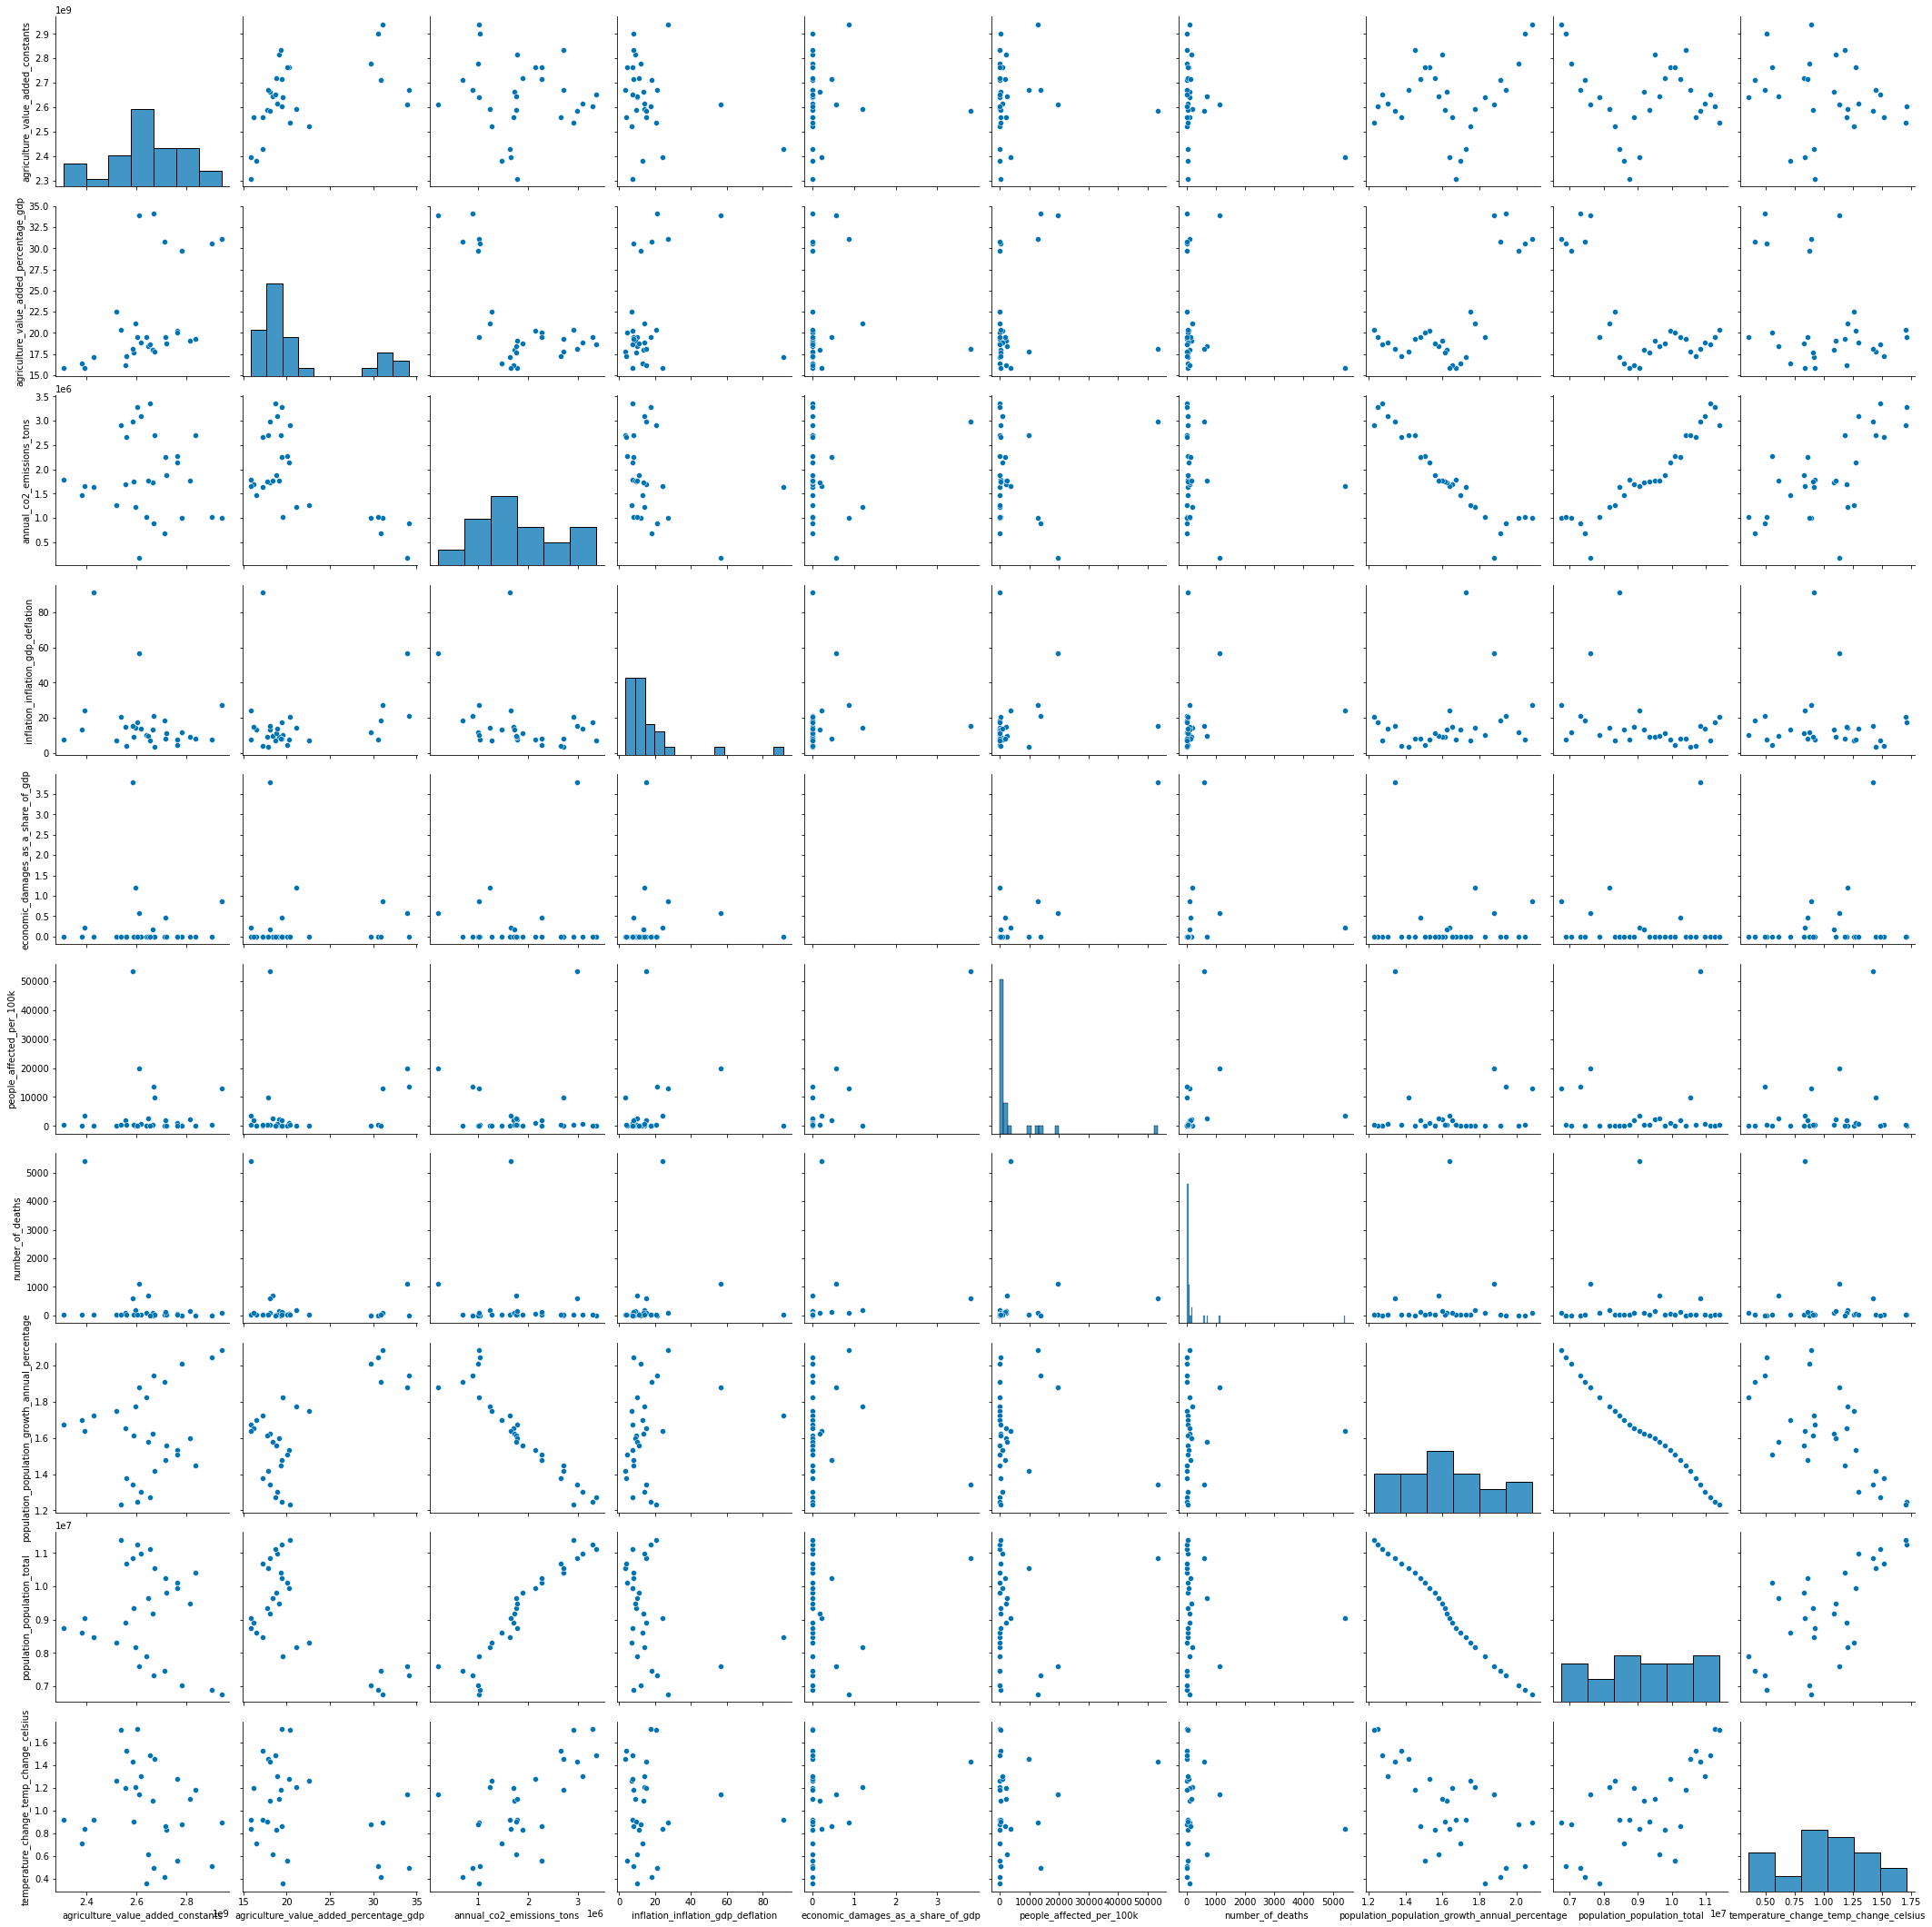

In [15]:
# Visualize the data using scatter plot and histogram
sb.set_palette('colorblind')
sb.pairplot(data=hti_df, height=3)

In [16]:
hti_df.corr ()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
agriculture_value_added_constants,1.000000,0.507059,-0.093286,-0.259306,-0.008574,0.014129,-0.316741,0.240571,-0.163897,-0.171410
agriculture_value_added_percentage_gdp,0.507059,1.000000,-0.630560,0.198078,0.011815,0.177447,-0.123978,0.689454,-0.674813,-0.343760
annual_co2_emissions_tons,-0.093286,-0.630560,1.000000,-0.301074,0.108885,0.045011,-0.106336,-0.938399,0.943305,0.681937
inflation_inflation_gdp_deflation,-0.259306,0.198078,-0.301074,1.000000,0.063999,0.145960,0.159594,0.248116,-0.281639,-0.040013
economic_damages_as_a_share_of_gdp,-0.008574,0.011815,0.108885,0.063999,1.000000,0.884217,0.106144,-0.080908,0.078288,0.200577
people_affected_per_100k,0.014129,0.177447,0.045011,0.145960,0.884217,1.000000,0.131632,-0.036106,0.037523,0.157611
number_of_deaths,-0.316741,-0.123978,-0.106336,0.159594,0.106144,0.131632,1.000000,0.025172,-0.037163,-0.086279
population_population_growth_annual_percentage,0.240571,0.689454,-0.938399,0.248116,-0.080908,-0.036106,0.025172,1.000000,-0.994809,-0.692178
population_population_total,-0.163897,-0.674813,0.943305,-0.281639,0.078288,0.037523,-0.037163,-0.994809,1.000000,0.671873
temperature_change_temp_change_celsius,-0.171410,-0.343760,0.681937,-0.040013,0.200577,0.157611,-0.086279,-0.692178,0.671873,1.000000


In [17]:
hti_corr_df = hti_df.corr(method='spearman')

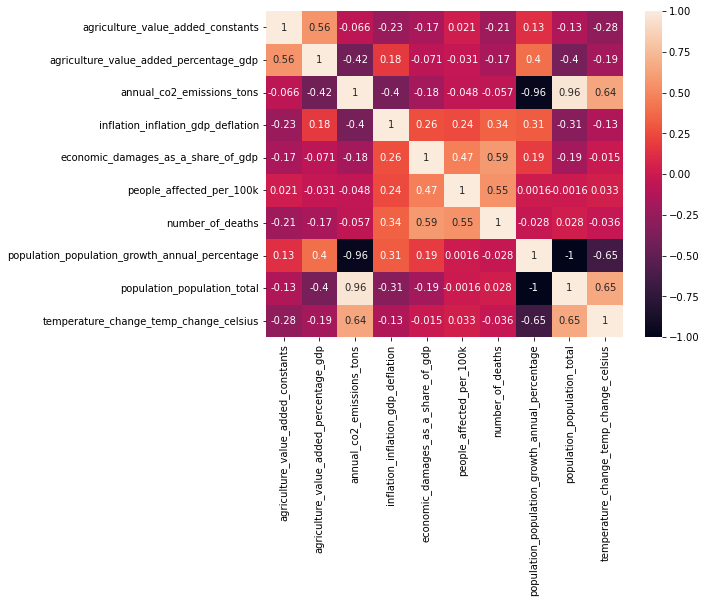

In [18]:
plt.figure(figsize=(8, 6))
sb.heatmap(hti_corr_df, annot=True)
plt.show()

### CORRELATION TESTS

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

In [19]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_total'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_total'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_total'], method='kendall'))

Correlación Pearson:  0.6718731895585782
Correlación spearman:  0.6533926585094549
Correlación kendall:  0.4666666666666667


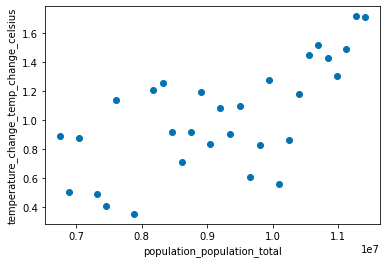

In [20]:
plt.scatter(hti_df.population_population_total , hti_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_total')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [21]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_growth_annual_percentage'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_growth_annual_percentage'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['population_population_growth_annual_percentage'], method='kendall'))

Correlación Pearson:  -0.6921776009117921
Correlación spearman:  -0.6533926585094549
Correlación kendall:  -0.4666666666666667


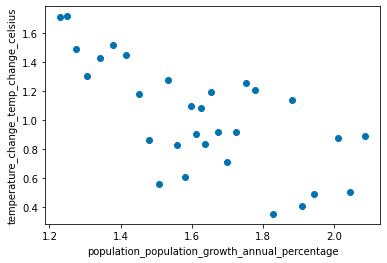

In [22]:
plt.scatter(hti_df.population_population_growth_annual_percentage, hti_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_growth_annual_percentage')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [23]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['annual_co2_emissions_tons'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['annual_co2_emissions_tons'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['annual_co2_emissions_tons'], method='kendall'))

Correlación Pearson:  0.6819370931565247
Correlación spearman:  0.6449388209121245
Correlación kendall:  0.46206896551724136


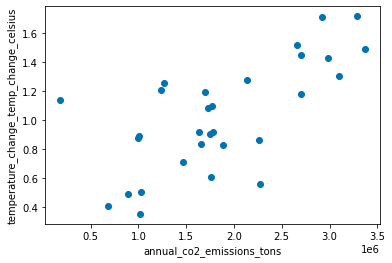

In [24]:
plt.scatter(hti_df.annual_co2_emissions_tons, hti_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [25]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.20057688940492782
Correlación spearman:  -0.015192907767686293
Correlación kendall:  0.005901785264970925


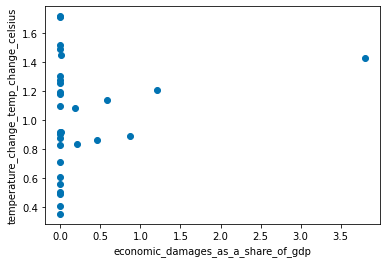

In [26]:
plt.scatter(hti_df.economic_damages_as_a_share_of_gdp, hti_df.temperature_change_temp_change_celsius )
plt.xlabel('economic_damages_as_a_share_of_gdp')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [27]:
# Correlación sin outlier
#r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
#print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

In [28]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['number_of_deaths'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['number_of_deaths'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['number_of_deaths'], method='kendall'))

Correlación Pearson:  -0.0862789276343365
Correlación spearman:  -0.03565464589691843
Correlación kendall:  -0.023284796312594613


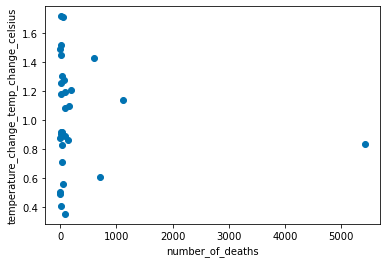

In [29]:
plt.scatter(hti_df.number_of_deaths, hti_df.temperature_change_temp_change_celsius )
plt.xlabel('number_of_deaths')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [30]:
# Correlación sin outlier
#Pendiente


In [31]:
print('Correlación Pearson: ', hti_df['number_of_deaths'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', hti_df['number_of_deaths'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', hti_df['number_of_deaths'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.10614412546931169
Correlación spearman:  0.5855184546725992
Correlación kendall:  0.4722502486105752


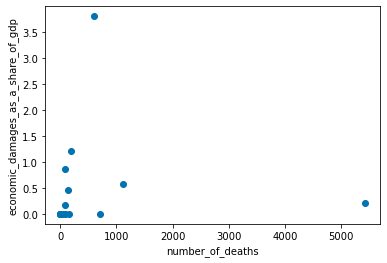

In [32]:
plt.scatter(hti_df.number_of_deaths, hti_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [33]:
# Correlación sin outlier
#Pendiente


In [34]:
print('Correlación Pearson: ', hti_df['people_affected_per_100k'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', hti_df['people_affected_per_100k'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', hti_df['people_affected_per_100k'].corr(hti_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.884216627791326
Correlación spearman:  0.4653213127531058
Correlación kendall:  0.3761613034367152


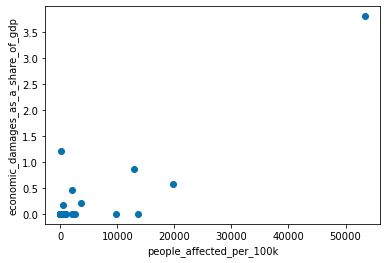

In [35]:
plt.scatter(hti_df.people_affected_per_100k, hti_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('people_affected_per_100k')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [36]:
# Correlación sin outlier
#Pendiente


In [37]:
print('Correlación Pearson: ', hti_df['economic_damages_as_a_share_of_gdp'].corr(hti_df['inflation_inflation_gdp_deflation'], method='pearson'))
print('Correlación spearman: ', hti_df['economic_damages_as_a_share_of_gdp'].corr(hti_df['inflation_inflation_gdp_deflation'], method='spearman'))
print('Correlación kendall: ', hti_df['economic_damages_as_a_share_of_gdp'].corr(hti_df['inflation_inflation_gdp_deflation'], method='kendall'))

Correlación Pearson:  0.0639991268134139
Correlación spearman:  0.2593094596959339
Correlación kendall:  0.20066069900901146


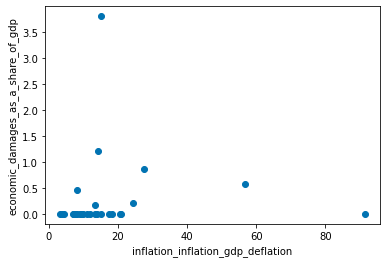

In [38]:
plt.scatter(hti_df.inflation_inflation_gdp_deflation, hti_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [39]:
print('Correlación Pearson: ', hti_df['inflation_inflation_gdp_deflation'].corr(hti_df['agriculture_value_added_constants'], method='pearson'))
print('Correlación spearman: ', hti_df['inflation_inflation_gdp_deflation'].corr(hti_df['agriculture_value_added_constants'], method='spearman'))
print('Correlación kendall: ', hti_df['inflation_inflation_gdp_deflation'].corr(hti_df['agriculture_value_added_constants'], method='kendall'))

Correlación Pearson:  -0.25930585569913495
Correlación spearman:  -0.2266963292547275
Correlación kendall:  -0.18160919540229886


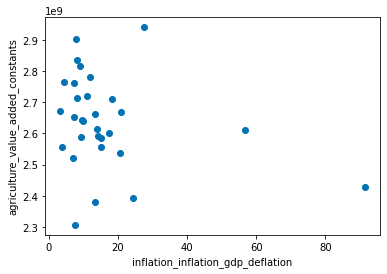

In [40]:
plt.scatter(hti_df.inflation_inflation_gdp_deflation, hti_df.agriculture_value_added_constants)
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('agriculture_value_added_constants')
plt.show()

In [41]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(hti_df['temperature_change_temp_change_celsius'], hti_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(hti_df['temperature_change_temp_change_celsius'], hti_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(hti_df['temperature_change_temp_change_celsius'], hti_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.6718731895585783, p-value=4.791259224139812e-05
Correlación Spearman: r=0.6533926585094549, p-value=9.048411497828581e-05
Correlación Pearson: r=0.4666666666666667, p-value=0.00019297391032914847


## Normalizando una variable 

In [42]:
normalized_ND_2 = hti_df['number_of_deaths']/np.linalg.norm(hti_df['number_of_deaths'])
hti_df = hti_df.assign(normalized_ND_2=normalized_ND_2)
hti_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2
year,,,,,,,,,,,
1988,2.940172e+09,31.110649,1007669,27.427622,0.873073,12928.381178,81.0,2.085452,6758222,0.890,0.014404
1989,2.901671e+09,30.592998,1023120,7.820710,0.000000,361.409104,0.0,2.043616,6897755,0.508,0.000000
1990,2.780139e+09,29.736751,994997,11.995750,0.000000,0.000000,0.0,2.011597,7037915,0.876,0.000000
1992,2.668984e+09,34.120608,888522,20.908166,0.000000,13663.068725,0.0,1.943488,7319491,0.492,0.000000
1993,2.710842e+09,30.847043,684199,18.336642,0.000000,67.015145,13.0,1.910631,7460684,0.409,0.002312


In [43]:
print('Correlación Pearson: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['normalized_ND_2'], method='pearson'))
print('Correlación spearman: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['normalized_ND_2'], method='spearman'))
print('Correlación kendall: ', hti_df['temperature_change_temp_change_celsius'].corr(hti_df['normalized_ND_2'], method='kendall'))

Correlación Pearson:  -0.08627892763433652
Correlación spearman:  -0.03565464589691843
Correlación kendall:  -0.023284796312594613


In [44]:
normalized_EDPGDP = hti_df['economic_damages_as_a_share_of_gdp']/np.linalg.norm(hti_df['economic_damages_as_a_share_of_gdp'])
hti_df = hti_df.assign(normalized_EDPGDP=normalized_EDPGDP)
hti_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,2.940172e+09,31.110649,1007669,27.427622,0.873073,12928.381178,81.0,2.085452,6758222,0.890,0.014404,0.209982
1989,2.901671e+09,30.592998,1023120,7.820710,0.000000,361.409104,0.0,2.043616,6897755,0.508,0.000000,0.000000
1990,2.780139e+09,29.736751,994997,11.995750,0.000000,0.000000,0.0,2.011597,7037915,0.876,0.000000,0.000000
1992,2.668984e+09,34.120608,888522,20.908166,0.000000,13663.068725,0.0,1.943488,7319491,0.492,0.000000,0.000000
1993,2.710842e+09,30.847043,684199,18.336642,0.000000,67.015145,13.0,1.910631,7460684,0.409,0.002312,0.000000


In [45]:
# Set independent and dependent variables
X = hti_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
y = hti_df['normalized_EDPGDP']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(30,)
Intercept: 0.18698427240806934
Coefficients: [-3.59541545e-08  1.17541574e-01  4.42675029e-08]


In [46]:
X = hti_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(hti_df['normalized_EDPGDP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_EDPGDP   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.4622
Date:                Fri, 26 Aug 2022   Prob (F-statistic):              0.711
Time:                        00:50:01   Log-Likelihood:                 10.866
No. Observations:                  30   AIC:                            -13.73
Df Residuals:                      26   BIC:                            -8.126
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [47]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.05063212197525757


In [48]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 0.4622146313803653
Probability of observing value at least as high as F-statistic: 0.7110782054618319


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [49]:
print(olsmod.pvalues)

const                                     0.685569
population_population_total               0.624767
temperature_change_temp_change_celsius    0.347946
annual_co2_emissions_tons                 0.725865
dtype: float64


All of our independent variables,  have p-value mayor than 0.05 which shows that there is not sufficient evidence that there variables affects our dependet variable.

In [50]:
# Set independent and dependent variables
X = hti_df[['normalized_EDPGDP']]
y = hti_df['inflation_inflation_gdp_deflation']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 15.911897023649827
Coefficients: [6.32357453]


In [51]:
X = hti_df[['normalized_EDPGDP']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(hti_df['inflation_inflation_gdp_deflation'], X).fit()
print(olsmod.summary())

                                    OLS Regression Results                                   
Dep. Variable:     inflation_inflation_gdp_deflation   R-squared:                       0.004
Model:                                           OLS   Adj. R-squared:                 -0.031
Method:                                Least Squares   F-statistic:                    0.1152
Date:                               Fri, 26 Aug 2022   Prob (F-statistic):              0.737
Time:                                       00:50:01   Log-Likelihood:                -127.65
No. Observations:                                 30   AIC:                             259.3
Df Residuals:                                     28   BIC:                             262.1
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

In [52]:
print(olsmod.pvalues)

const                0.000067
normalized_EDPGDP    0.736880
dtype: float64


## Encoding

In [53]:
hti_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,2.940172e+09,31.110649,1007669,27.427622,0.873073,12928.381178,81.0,2.085452,6758222,0.890,0.014404,0.209982
1989,2.901671e+09,30.592998,1023120,7.820710,0.000000,361.409104,0.0,2.043616,6897755,0.508,0.000000,0.000000
1990,2.780139e+09,29.736751,994997,11.995750,0.000000,0.000000,0.0,2.011597,7037915,0.876,0.000000,0.000000
1992,2.668984e+09,34.120608,888522,20.908166,0.000000,13663.068725,0.0,1.943488,7319491,0.492,0.000000,0.000000
1993,2.710842e+09,30.847043,684199,18.336642,0.000000,67.015145,13.0,1.910631,7460684,0.409,0.002312,0.000000


In [54]:
hti_df = hti_df.drop(['normalized_ND_2','normalized_EDPGDP'],axis=1)
hti_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,
1988,2.940172e+09,31.110649,1007669,27.427622,0.873073,12928.381178,81.0,2.085452,6758222,0.890
1989,2.901671e+09,30.592998,1023120,7.820710,0.000000,361.409104,0.0,2.043616,6897755,0.508
1990,2.780139e+09,29.736751,994997,11.995750,0.000000,0.000000,0.0,2.011597,7037915,0.876
1992,2.668984e+09,34.120608,888522,20.908166,0.000000,13663.068725,0.0,1.943488,7319491,0.492
1993,2.710842e+09,30.847043,684199,18.336642,0.000000,67.015145,13.0,1.910631,7460684,0.409


In [55]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(hti_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius',
])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,2.081096,1.796427,-1.051144,0.652415,0.875091,0.844849,-0.224195,1.949538,-1.776146,-0.362913
1,1.815419,1.702355,-1.032130,-0.495395,-0.339506,-0.374431,-0.306714,1.772296,-1.675020,-1.395688
2,0.976782,1.546750,-1.066737,-0.250984,-0.339506,-0.409495,-0.306714,1.636642,-1.573440,-0.400764
3,0.209755,2.343424,-1.197762,0.270759,-0.339506,0.916130,-0.306714,1.348092,-1.369369,-1.438946
4,0.498600,1.748522,-1.449195,0.120219,-0.339506,-0.402993,-0.293470,1.208889,-1.267041,-1.663345


In [56]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               30 non-null     float64
 1   agriculture_value_added_percentage_gdp          30 non-null     float64
 2   annual_co2_emissions_tons                       30 non-null     float64
 3   inflation_inflation_gdp_deflation               30 non-null     float64
 4   economic_damages_as_a_share_of_gdp              30 non-null     float64
 5   people_affected_per_100k                        30 non-null     float64
 6   number_of_deaths                                30 non-null     float64
 7   population_population_growth_annual_percentage  30 non-null     float64
 8   population_population_total                     30 non-null     float64
 9   temperature_change_temp_change_celsius       

### Dependent Variable

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva. Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

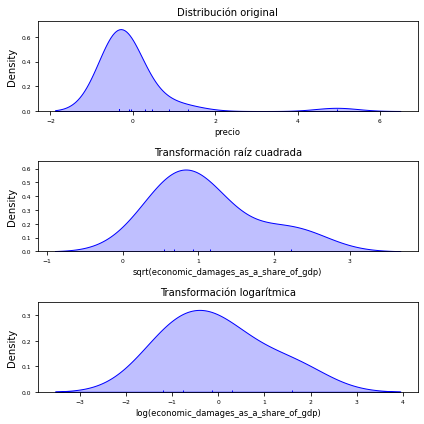

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    df_scaled.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [58]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(df_scaled.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,130.206926,620.679030,54.241418,inf,0.633309,3.388442e-12
powerlaw,155.460779,444.642454,59.559475,inf,0.646175,9.573017e-13
expon,157.383265,1345.098529,56.526994,inf,0.750032,5.688774e-18
chi2,167.174785,514.033853,61.738867,inf,0.739334,2.346506e-17
beta,175.280315,3742.419612,66.560463,inf,0.424743,1.995412e-05
exponpow,189.514470,913.197241,65.501632,inf,0.440259,8.201646e-06
logistic,194.033632,1419.490777,62.807418,inf,0.394323,1.022850e-04
lognorm,198.061444,995.650715,66.824990,inf,0.531476,1.945272e-08
norm,203.237837,951.418239,64.197780,inf,0.397405,8.723354e-05
cauchy,213.091612,7872.396153,65.618139,inf,0.500000,1.846731e-07


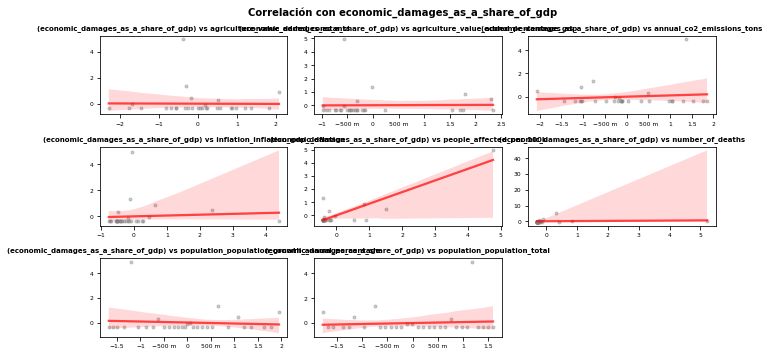

In [59]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_scaled.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('economic_damages_as_a_share_of_gdp')

for i, colum in enumerate(columnas_numeric):
    sb.regplot(
        x           = df_scaled[colum],
        y           = df_scaled['economic_damages_as_a_share_of_gdp'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"(economic_damages_as_a_share_of_gdp) vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con economic_damages_as_a_share_of_gdp', fontsize = 10, fontweight = "bold");

### Training and testing the model

In [60]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)


In [61]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [62]:
print(Y_pred_multiple)
print(y_test)

[-0.14332241  0.70001544 -0.49083111 -0.32067806 -0.15878486 -0.45706439]
12   -0.339506
0     0.875091
4    -0.339506
22   -0.339506
16   -0.339506
20   -0.339506
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [63]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[8.66738487e-01 8.40077322e-02 6.80826232e-04]
Valor de la intersección o coeficiente "b":
-0.0016075756104235936


In [64]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.7797909376744676


In [65]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.780
Model:                                            OLS   Adj. R-squared:                  0.747
Method:                                 Least Squares   F-statistic:                     23.61
Date:                                Fri, 26 Aug 2022   Prob (F-statistic):           8.87e-07
Time:                                        00:50:04   Log-Likelihood:                -18.013
No. Observations:                                  24   AIC:                             44.03
Df Residuals:                                      20   BIC:                             48.74
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [66]:
print(modelo.pvalues)

const                                     9.890155e-01
people_affected_per_100k                  9.988141e-08
temperature_change_temp_change_celsius    4.742404e-01
number_of_deaths                          9.949030e-01
dtype: float64


In [67]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.242153,0.238938
people_affected_per_100k,0.642984,1.090493
temperature_change_temp_change_celsius,-0.156255,0.324271
number_of_deaths,-0.218873,0.220234


### Complete model without split

In [68]:
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 5.217288755707113e-16
Coefficients: [ 0.20898674 -0.0758337   0.88644284  0.01330379 -0.5329804  -0.72768257
  0.03645507]


## Model Validation

In [69]:
X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.797
Model:                                            OLS   Adj. R-squared:                  0.732
Method:                                 Least Squares   F-statistic:                     12.31
Date:                                Fri, 26 Aug 2022   Prob (F-statistic):           2.57e-06
Time:                                        00:50:16   Log-Likelihood:                -18.680
No. Observations:                                  30   AIC:                             53.36
Df Residuals:                                      22   BIC:                             64.57
Df Model:                                           7                                         
Covariance Type:                            nonrobust                                         
                                                  

In [70]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.7965876850555198


In [71]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 12.307815761165214
Probability of observing value at least as high as F-statistic: 2.5652596446466143e-06


In [72]:
print(olsmod_scaled.pvalues)

const                                             1.000000e+00
annual_co2_emissions_tons                         4.995755e-01
inflation_inflation_gdp_deflation                 4.972848e-01
people_affected_per_100k                          1.116598e-08
number_of_deaths                                  8.968375e-01
population_population_growth_annual_percentage    6.178564e-01
population_population_total                       5.039552e-01
temperature_change_temp_change_celsius            8.033010e-01
dtype: float64


MODELO GLS

In [73]:
from __future__ import print_function
import statsmodels.api as sm
import numpy as np
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

# Set independent and dependent variables

X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Primero obtendremos los residuos del ajuste.

ols_resid = sm.OLS(y, X).fit().resid

resid_fit = sm.OLS(ols_resid[1:], sm.add_constant(ols_resid[:-1])).fit()
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])

rho = resid_fit.params[1]

from scipy.linalg import toeplitz

toeplitz(range(5))

order = toeplitz(range(len(ols_resid)))

sigma = rho**order
gls_model = sm.GLS(y, X, sigma=sigma)
gls_results = gls_model.fit()

glsar_model = sm.GLSAR(y, X, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

ValueError: The indices for endog and exog are not aligned

### Modelo 

In [74]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -6.525011904284762e-17
Coefficients: [0.88421663]


In [75]:
X = df_scaled[['people_affected_per_100k',]]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.782
Model:                                            OLS   Adj. R-squared:                  0.774
Method:                                 Least Squares   F-statistic:                     100.3
Date:                                Fri, 26 Aug 2022   Prob (F-statistic):           9.27e-11
Time:                                        00:51:51   Log-Likelihood:                -19.730
No. Observations:                                  30   AIC:                             43.46
Df Residuals:                                      28   BIC:                             46.26
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                               coef    std err    

In [76]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.7818390448626643


In [77]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 100.3456060337358
Probability of observing value at least as high as F-statistic: 9.265056444078448e-11


In [78]:
print(olsmod_scaled.pvalues)

const                       1.000000e+00
people_affected_per_100k    9.265056e-11
dtype: float64


In [79]:
df_scaled['residual'] = olsmod_scaled.resid

### Assumption Testing

#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

In [80]:
df_scaled['predictions'] = olsmod.predict(X)

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


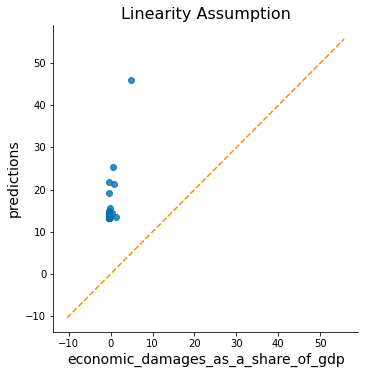

In [81]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point dont spread around the diagonal line, so we can assume that there isnt linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 3.2693848031137105e-09


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


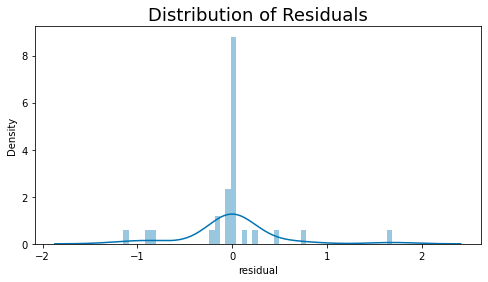

Residuals are not normally distributed


In [82]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                     people_affected_per_100k  \
people_affected_per_100k                            1.000000   
economic_damages_as_a_share_of_gdp                  0.884217   

                                    economic_damages_as_a_share_of_gdp  
people_affected_per_100k                                      0.884217  
economic_damages_as_a_share_of_gdp                            1.000000  


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


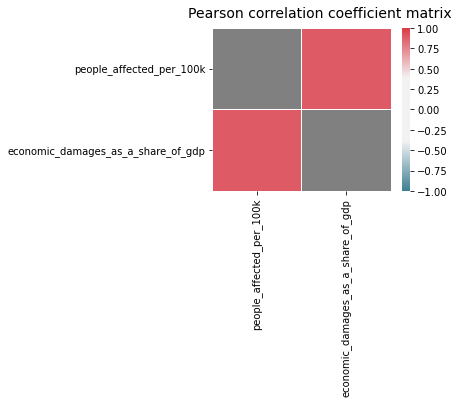

In [83]:
corr = df_scaled[['people_affected_per_100k','economic_damages_as_a_share_of_gdp']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [85]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.0006103132714963
Little to no autocorrelation 

Assumption satisfied


#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

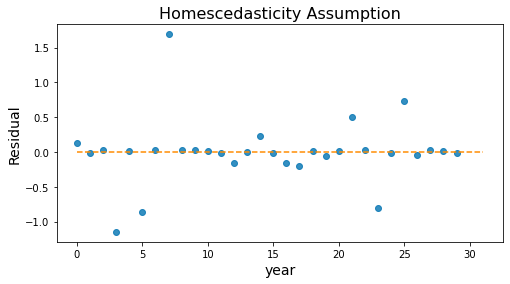

In [86]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_scaled.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  